# Preamble & Imports

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import random
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils.extmath import randomized_svd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets, metrics, model_selection, svm
from sklearn.naive_bayes import GaussianNB
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from string import punctuation
import string
from string import punctuation
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.models import KeyedVectors
!pip install umap-learn
!pip install datashader
!pip install bokeh
!pip install holoviews
!pip install scikit-image
!pip install colorcet
import umap.umap_ as umap
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Q1

In [ ]:
# to load on system
#df = pd.read_csv('/Users/shruti/Desktop/Winter_2022Courses/219/project1/Project_1_dataset_01_01_2022.csv')
# samples,features = df.shape
# print('samples,features', samples,features)


samples,features 2072 9


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ECE219/Project1/Project_1_dataset_01_01_2022.csv')
samples,features = df.shape
print('samples,features', samples,features)


samples,features 2072 9


In [ ]:
# dataset
df = df.rename(columns={'Unnamed: 0	': 'Unnamed'})
df=df.drop('Unnamed: 0',1)
df


full_text  \
0     Having made a massive impact in Saudi Arabia w...   
1     Cricket is all about the emotional rollercoast...   
2     New Zealand announces back-to-back tours next ...   
3     It's not the first time cricket fans in the co...   
4     An employee works on a computer terminal again...   
...                                                 ...   
2067  DES MOINES, Iowa -- Drought conditions are exp...   
2068  WASHINGTON — Vice President Kamala Harris is m...   
2069  Drought conditions plaguing much of North Caro...   
2070  LAKEWOOD, CO — Mild drought conditions hit Lak...   
2071  An update to the U.S. drought monitor came out...   

                                                summary  \
0     Having made a massive impact in Saudi Arabia w...   
1     No matter which team fans hope to win, every s...   
2     New Zealand announces back-to-back tours next ...   
3     Billed as one of the pre-tournament favourites...   
4     REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...   
...                                                 ...   
2067  DES MOINES, Iowa -- Drought conditions are exp...   
2068  WASHINGTON — Vice President Kamala Harris is m...   
2069  Drought conditions plaguing much of North Caro...   
2070  LAKEWOOD, CO — Mild drought conditions hit Lak...   
2071  CHARLOTTE, N.C. — The latest United States dro...   

                                               keywords  \
0     ['singhs', 'rooting', 'cool', 'saudi', 'style'...   
1     ['wants', 'fans', 'finals', 'cup', 'win', 'tou...   
2     ['test', 'west', 'tour', 'zealand', 'world', '...   
3     ['qualify', 'afghanistan', 'cup', 'world', 'ze...   
4     ['success', 'tech', 'startup', 'talent', 'onli...   
...                                                 ...   
2067  ['conditions', 'widespread', 'expand', 'week',...   
2068  ['mead', 'change', 'president', 'vice', 'harri...   
2069  ['plaguing', 'nina', 'conditions', 'weather', ...   
2070  ['worsened', 'conditions', 'midseptember', 'ac...   
2071  ['minimal', 'conditions', 'week', 'weather', '...   

                    publish_date               authors  \
0                            NaN                    []   
1                            NaN                    []   
2            2021-12-20 00:00:00                    []   
3                            NaN                    []   
4            2021-10-11 00:00:00        ['Una Galani']   
...                          ...                   ...   
2067         2021-10-07 00:00:00        ['Trent Rice']   
2068  2021-10-18 11:49:57.566000  ['Associated Press']   
2069   2021-12-21 20:07:00+00:00                    []   
2070   2021-10-05 14:17:58+00:00                    []   
2071         2021-12-23 10:20:00                    []   

                                                    url leaf_label root_label  
0     https://www.msn.com/en-in/entertainment/other/...    cricket     sports  
1     https://www.prnewswire.com:443/news-releases/c...    cricket     sports  
2     https://www.aljazeera.com/news/2021/12/20/cric...    cricket     sports  
3     https://www.msn.com/en-in/news/other/t20-world...    cricket     sports  
4     https://www.reuters.com/breakingviews/india-in...    cricket     sports  
...                                                 ...        ...        ...  
2067  https://1430kasi.iheart.com/content/2021-10-07...    drought    climate  
2068  https://www.abc15.com/news/national/harris-to-...    drought    climate  
2069  https://www.wwaytv3.com/drought-conditions-pla...    drought    climate  
2070  https://patch.com/colorado/lakewood-co/drought...    drought    climate  
2071  https://www.wcnc.com/article/weather/minimal-c...    drought    climate  

[2072 rows x 8 columns]

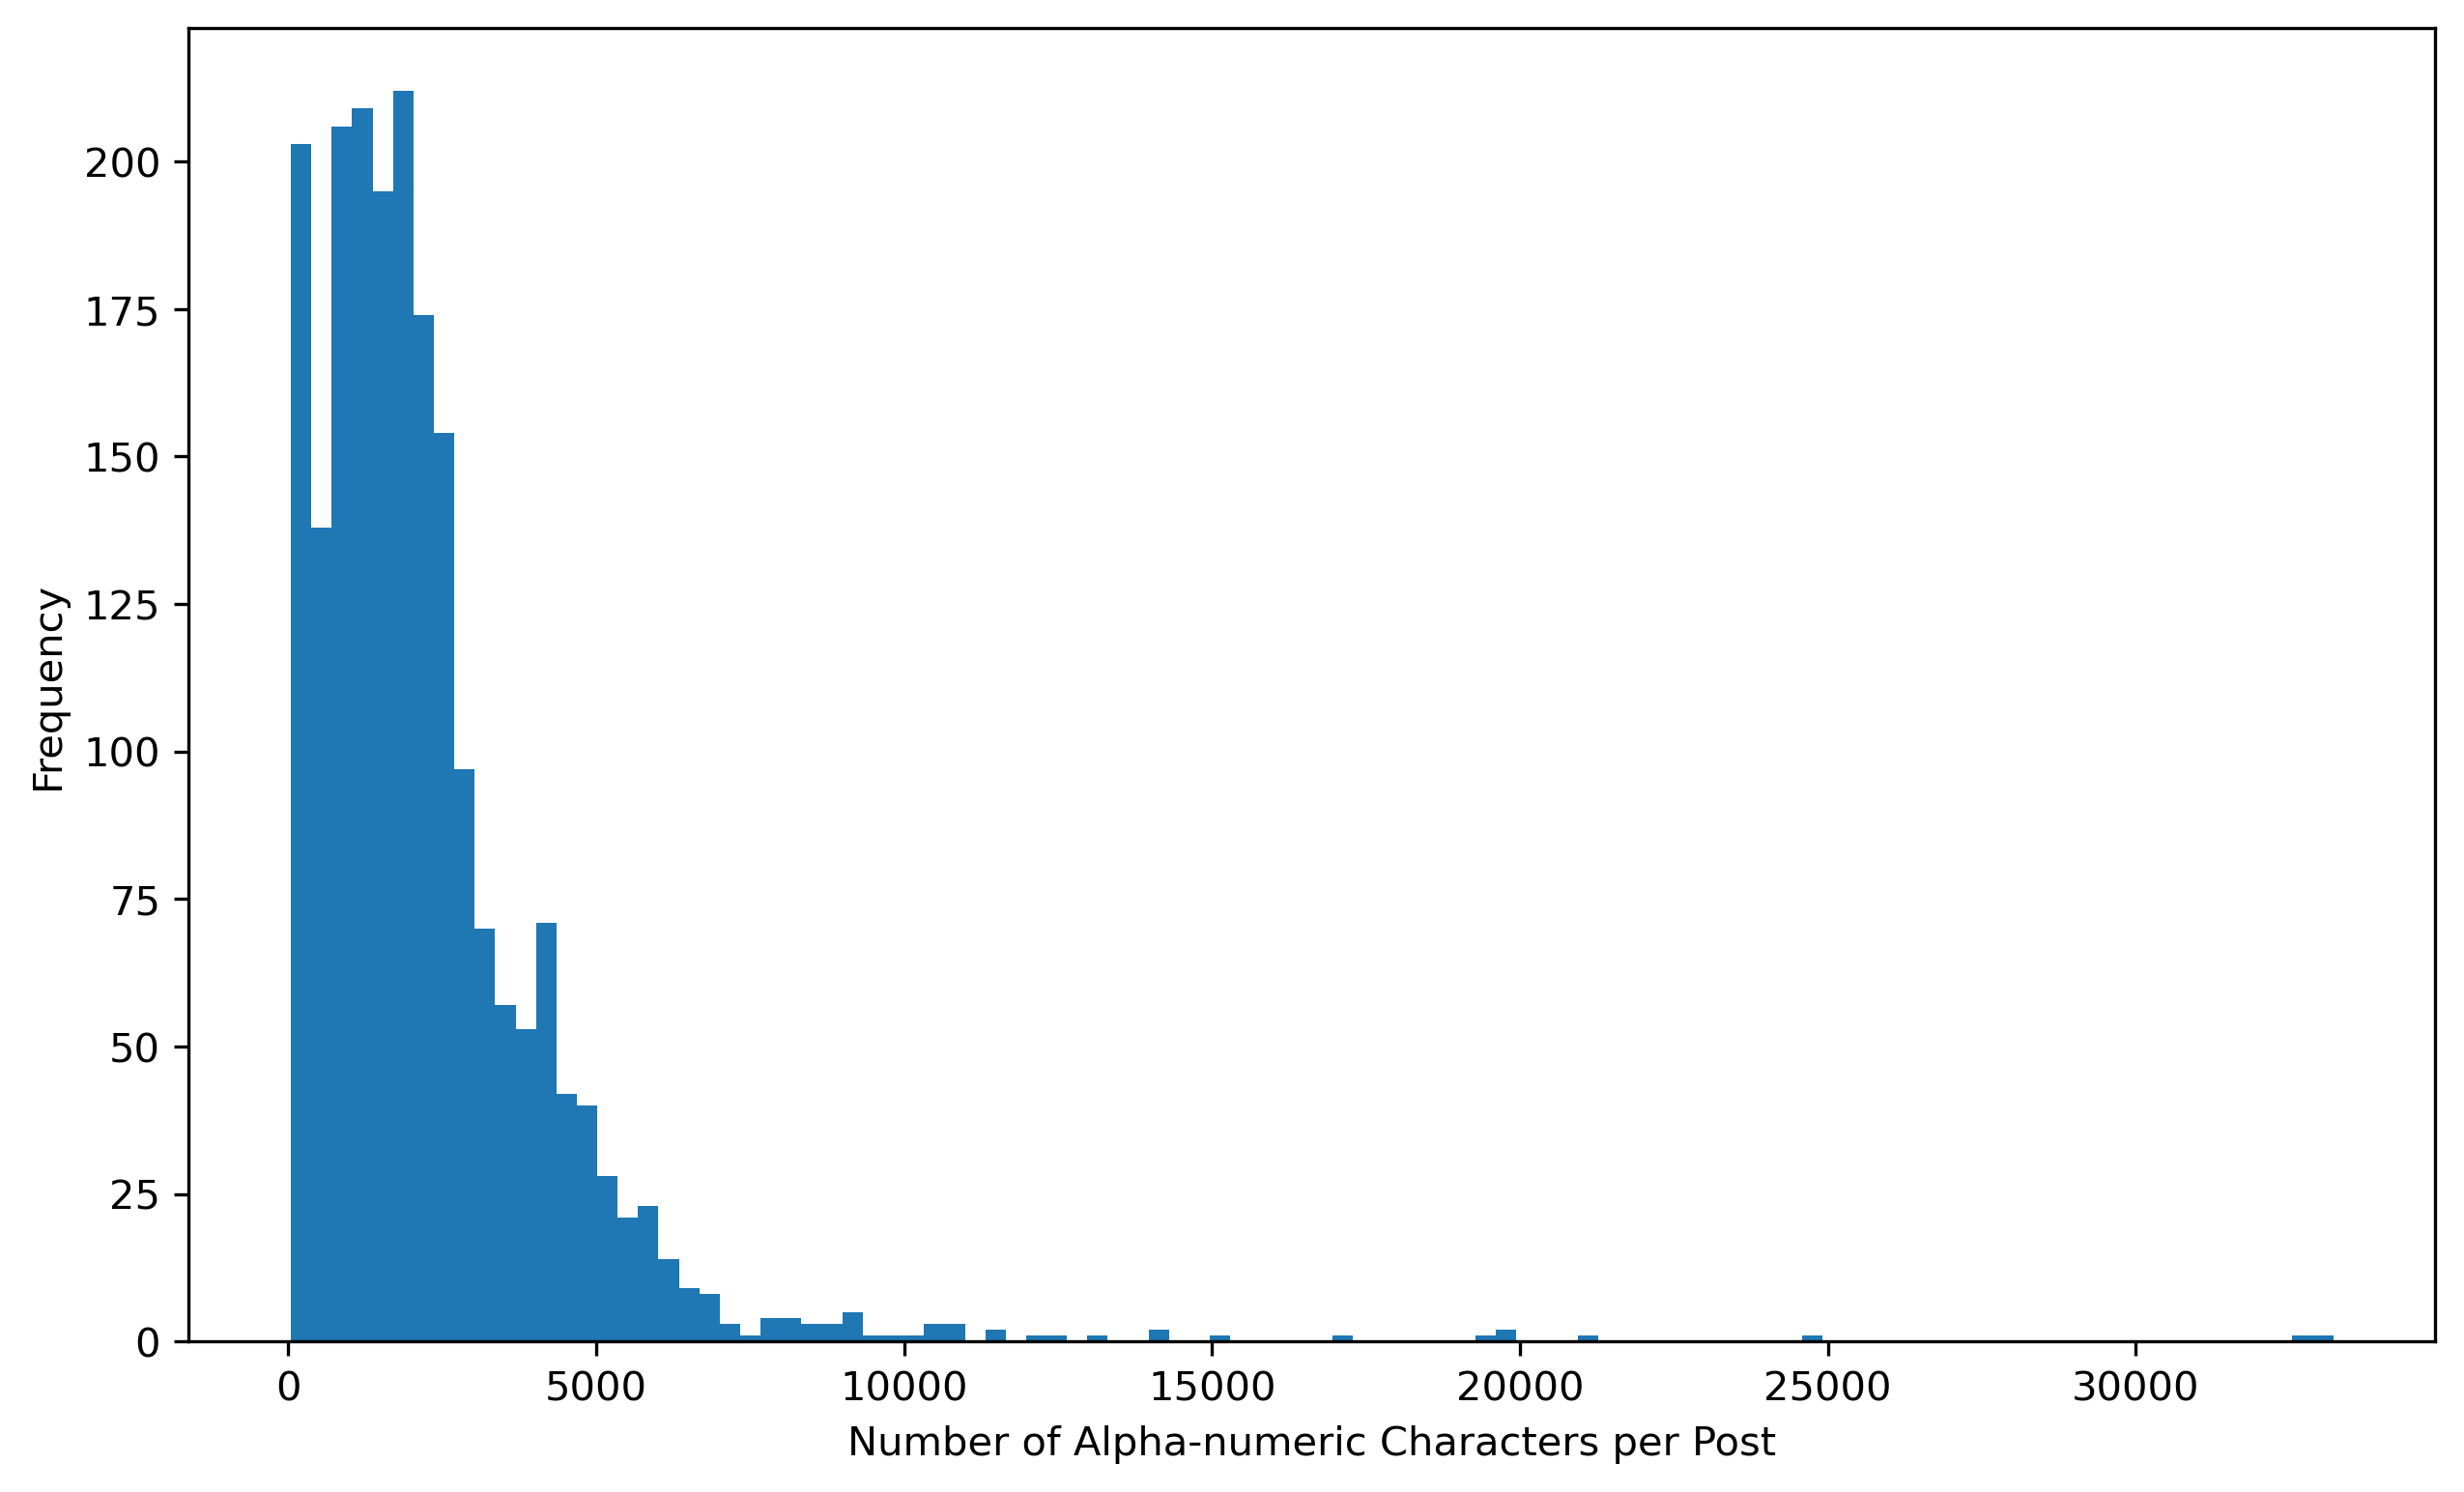

In [ ]:
count2 = []
for line in df['full_text']:
  line = line.split()
  line = [list(line1) for line1 in line]
  line = sum(line,[])
  line_char =  sum(i.isalnum() for i in line)
  count2.append(line_char)

# print(count2)
figure(figsize=(10, 6), dpi=300)
plt.hist(count2, bins=100)
plt.xlabel('Number of Alpha-numeric Characters per Post')
plt.ylabel('Frequency')
plt.savefig('Q1.1.png',dpi=300,bbox_inches='tight')

{'earthquake', 'flood', 'drought', '%22forest%20fire%22', 'football', 'cricket', 'soccer', 'chess'}


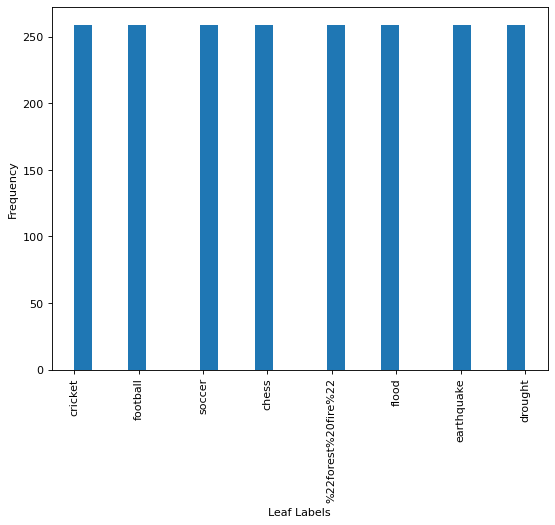

In [ ]:

set1=set(df['leaf_label'])
print(set1)

# Uncomment one by on to get answer
#df['Unnamed: 0'].hist()
figure(figsize=(8, 6), dpi=80)
plt.hist(df['leaf_label'], bins=25)
plt.xlabel('Leaf Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.savefig('Q1.2.png',dpi=300,bbox_inches='tight')


Leaf_label -> Data set is uniformly balanced


{'climate', 'sports'}


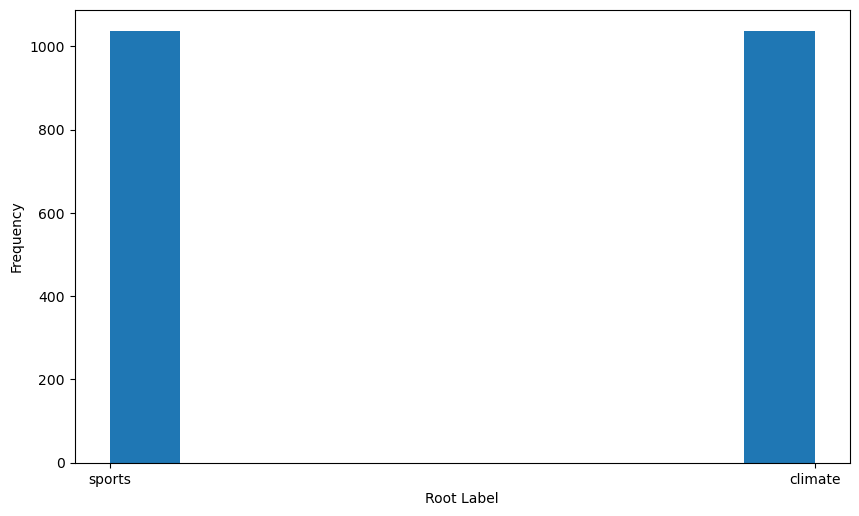

In [ ]:
set1=set(df['root_label'])
print(set1)
# Uncomment one by on to get answer
#df['Unnamed: 0'].hist()
figure(figsize=(10,6), dpi=100)
plt.hist(df['root_label'], bins=10)
plt.xlabel('Root Label')
plt.ylabel('Frequency')
# plt.xticks(rotation=90)
plt.savefig('Q1.3.png',dpi=300,bbox_inches='tight')

Root Label-> Dataset is uniformly balanced

#Q2


In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:


train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)



In [ ]:
print("Train Dataset shape: ",train.shape, "Test Dataset Shape:", test.shape)

Train Dataset shape:  (1657, 2) Test Dataset Shape: (415, 2)


Feature Extraction

#Q3

In [ ]:

def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  if text=="":
    return ""
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  
  return texter

In [ ]:
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

lemmer = WordNetLemmatizer()
def lemmatize_sent(text):
    return [lemmer.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(nltk.word_tokenize(text))]

In [ ]:
# clean the train data
train_clean=[]
for data_point in (train['full_text']):
  lemma= lemmatize_sent(data_point)
  data_point=" ".join(lemma)
  
  # remove HTML
  data_point= clean(data_point)
  words=nltk.word_tokenize(data_point)

  # removing numeric characters and punctuation
  
  data_point=" ".join([word for word in words if (not word.isdigit() and word not in punctuation)])
  train_clean.append(data_point)


In [ ]:
# clean the train data
test_clean=[]
for data_point in (test['full_text']):
  
  #clean - remove HTML
  clean_point= clean(data_point)
  # lemmatise data, and then remove punc and digit
  data_point= lemmatizer_func(clean_point)

  test_clean.append(data_point)

In [ ]:
print("Train Cleaned Data Shape:", np.array(train_clean).shape)
print("Test Cleaned Data Shape:", np.array(test_clean).shape)
# print(train_clean[:2])
# print(test_clean[:2])


Train Cleaned Data Shape: (1657,)
Test Cleaned Data Shape: (415,)


In [ ]:
pipe = Pipeline([('count', CountVectorizer(min_df=3,  stop_words='english')),
                  ('tfid', TfidfTransformer())])
train_features=pipe.fit_transform(train_clean)
print(train_features.shape)

(1657, 10440)


In [ ]:
test_features=pipe.transform(test_clean)
print(test_features.shape)

(415, 10440)


#Q4

In [ ]:
## LSI for train 
LSI_variance=[]
k_range=[1, 10, 50, 100, 200, 500, 1000, 2000]
for k in k_range:

  svd = TruncatedSVD(n_components=k, n_iter=10, random_state=42)
  train_features_reduced = svd.fit_transform(train_features)
  variance= np.sum(svd.explained_variance_ratio_)
  LSI_variance.append(variance)

print(train_features_reduced.shape)
print(np.array(LSI_variance).shape)


(1657, 1657)
(8,)


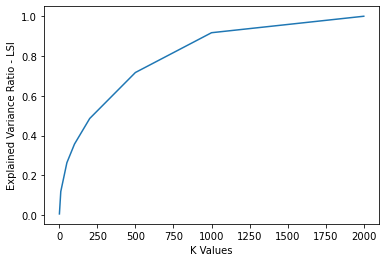

In [ ]:
plt.plot(k_range, LSI_variance)
plt.ylabel('Explained Variance Ratio - LSI')
plt.xlabel("K Values")
plt.savefig('Q4.1.png',dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
## LSI for test
LSI_variance_test=[]
k_range=[1, 10, 50, 100, 200, 500, 1000, 2000]
for k in k_range:

  svd = TruncatedSVD(n_components=k, n_iter=7, random_state=42)
  test_features_reduced = svd.fit_transform(test_features)
  variance= np.sum(svd.explained_variance_ratio_)
  LSI_variance_test.append(variance)

print(test_features_reduced.shape)
print(np.array(LSI_variance_test).shape)


(415, 415)
(8,)


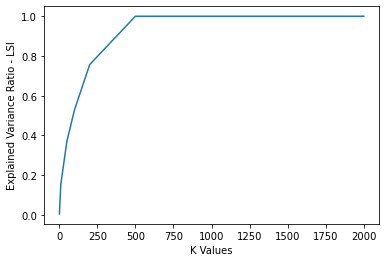

In [ ]:
plt.plot(k_range, LSI_variance_test)
plt.ylabel('Explained Variance Ratio - LSI')
plt.xlabel("K Values")
plt.savefig('Q4.2.png',dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
model_lsi = TruncatedSVD(n_components=50, random_state=42)
model_nmf = NMF(n_components=50, init='random', random_state=42, max_iter=300)

train_reduced_LSI = model_lsi.fit_transform(train_features)
print('LSI Train Data Shape:', train_reduced_LSI.shape)
train_reduced_NMF = model_nmf.fit_transform(train_features)
print('NMF Train Data Shape:', train_reduced_NMF.shape)
U_tr,S_tr,V_tr = randomized_svd(train_features,n_components=50,random_state=42)
lsi_train_error= np.sum(np.array(train_features - (U_tr.dot(np.diag(S_tr)).dot(V_tr)))**2)
print('LSI (train) error:',lsi_train_error)
nmf_train_error= np.sum(np.array(train_features - train_reduced_NMF.dot(model_nmf.components_))**2)
print('NMF (train) error:',nmf_train_error)

test_reduced_LSI = model_lsi.transform(test_features)
print('LSI Test Data Shape:', test_reduced_LSI.shape)
test_reduced_NMF = model_nmf.transform(test_features)
print('NMF Test Data Shape:', test_reduced_NMF.shape)
U_te,S_te,V_te = randomized_svd(test_features,n_components=50,random_state=42)
lsi_test_error= np.sum(np.array(test_features - (U_te.dot(np.diag(S_te)).dot(V_te)))**2)
print('LSI (test) error:',lsi_test_error)
nmf_test_error= np.sum(np.array(test_features - test_reduced_NMF.dot(model_nmf.components_))**2)
print('NMF (test) error:', nmf_test_error)

LSI Train Data Shape: (1657, 50)
NMF Train Data Shape: (1657, 50)
LSI (train) error: 1182.6611522898754
NMF (train) error: 1204.2413228075834
LSI Test Data Shape: (415, 50)
NMF Test Data Shape: (415, 50)
LSI (test) error: 253.6054178609146
NMF (test) error: 307.5300103681181


#Q5 Classification


#SVM

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(C= 1000, gamma='auto'))
clf.fit(train_reduced_LSI, train['root_label'])
print(test_reduced_LSI.shape, train_reduced_LSI.shape)
y = clf.predict(test_reduced_LSI)
print(y.shape)
print(test_reduced_LSI.shape)

(415, 50) (1657, 50)
(415,)
(415, 50)


[[199   7]
 [  6 203]] 0.9686717883502023 0.9686556417522181 0.9686746987951808 0.96869918699187


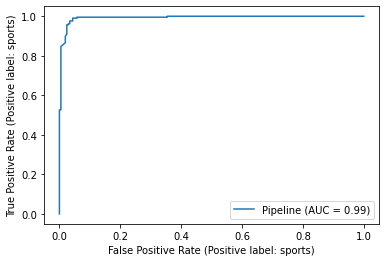

In [ ]:
## Metric
metrics.plot_roc_curve(clf, test_reduced_LSI, test['root_label']) 
cm = confusion_matrix(test['root_label'], y)
f1 = f1_score(test['root_label'], y, average='macro')
recall = recall_score(test['root_label'], y, average='macro')
accuracy = accuracy_score(test['root_label'], y)
precision = precision_score(test['root_label'], y, average='macro')
print(cm, f1, recall, accuracy, precision)

In [ ]:
### Soft Margin 
clf = make_pipeline(StandardScaler(), SVC(C= 0.0001, gamma='auto'))
clf.fit(train_reduced_LSI, train['root_label'])
### Change to test features
y = clf.predict(test_reduced_LSI)
print(y.shape)

(415,)


[[206   0]
 [209   0]] 0.33172302737520126 0.5 0.4963855421686747 0.24819277108433735


/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


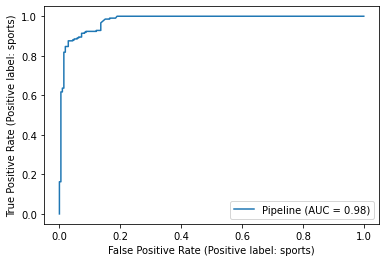

In [ ]:
## Metric
metrics.plot_roc_curve(clf, test_reduced_LSI, test['root_label']) 
cm = confusion_matrix(test['root_label'], y)
f1 = f1_score(test['root_label'], y, average='macro')
recall = recall_score(test['root_label'], y, average='macro')
accuracy = accuracy_score(test['root_label'], y)
precision = precision_score(test['root_label'], y, average='macro')
print(cm, f1, recall, accuracy, precision)

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(C= 100000, gamma='auto'))
clf.fit(train_reduced_LSI, train['root_label'])
### Change to test features
y = clf.predict(test_reduced_LSI)
print(y.shape)


(415,)


[[199   7]
 [  6 203]] 0.9686717883502023 0.9686556417522181 0.9686746987951808 0.96869918699187


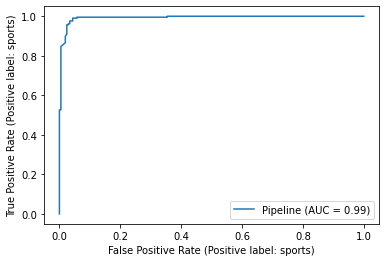

In [ ]:
## Metric
metrics.plot_roc_curve(clf, test_reduced_LSI, test['root_label']) 
cm = confusion_matrix(test['root_label'], y)
f1 = f1_score(test['root_label'], y, average='macro')
recall = recall_score(test['root_label'], y, average='macro')
accuracy = accuracy_score(test['root_label'], y)
precision = precision_score(test['root_label'], y, average='macro')
print(cm, f1, recall, accuracy, precision)

In [ ]:
parameters = {'kernel':['linear'], 'C':[0.001,0.01,0.1,1,10,100,300,350,400,450,500,700, 1000,10000,100000,500000]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5,scoring='accuracy')
clf.fit(train_reduced_LSI,train['root_label'])
#clf.best_params_


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 300, 350, 400, 450,
                               500, 700, 1000, 10000, 100000, 500000],
                         'kernel': ['linear']},
             scoring='accuracy')

In [ ]:
pred_cv = clf.best_estimator_.predict(test_reduced_LSI)
print('Gamma',clf.best_params_['C']) 
for l, n in zip(parameters['C'],clf.cv_results_['mean_test_score']):
    print(f'gamma: {l}',f'Avg. validation accuracy: {n}')


Gamma 300
gamma: 0.001 Avg. validation accuracy: 0.5009063444108761
gamma: 0.01 Avg. validation accuracy: 0.5009063444108761
gamma: 0.1 Avg. validation accuracy: 0.9426655261529501
gamma: 1 Avg. validation accuracy: 0.9408510173625014
gamma: 10 Avg. validation accuracy: 0.9559385578568049
gamma: 100 Avg. validation accuracy: 0.9583572962545045
gamma: 300 Avg. validation accuracy: 0.9589578859243619
gamma: 350 Avg. validation accuracy: 0.9577494267098604
gamma: 400 Avg. validation accuracy: 0.957751246678557
gamma: 450 Avg. validation accuracy: 0.9571470170713063
gamma: 500 Avg. validation accuracy: 0.9571470170713063
gamma: 700 Avg. validation accuracy: 0.9553361482182506
gamma: 1000 Avg. validation accuracy: 0.9541295089724458
gamma: 10000 Avg. validation accuracy: 0.9547319186109998
gamma: 100000 Avg. validation accuracy: 0.9547319186109998
gamma: 500000 Avg. validation accuracy: 0.9547319186109998


[[200   6]
 [  3 206]] 0.9783087189077119 0.9782598597110606 0.9783132530120482 0.9784598940421972


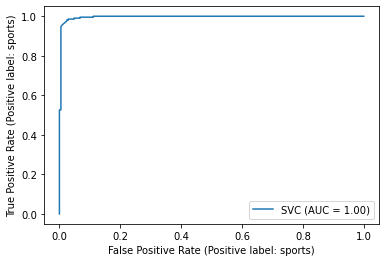

In [ ]:
## Metric
metrics.plot_roc_curve(clf.best_estimator_, test_reduced_LSI, test['root_label']) 
cm = confusion_matrix(test['root_label'], pred_cv)
f1 = f1_score(test['root_label'], pred_cv, average='macro')
recall = recall_score(test['root_label'], pred_cv, average='macro')
accuracy = accuracy_score(test['root_label'], pred_cv)
precision = precision_score(test['root_label'], pred_cv, average='macro')
print(cm, f1, recall, accuracy, precision)

# Logistic Regression

In [ ]:
# without regularisation
clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='none',random_state=42,max_iter=1000))
clf.fit(train_reduced_LSI, train['root_label'])
predictlog_wo_reg= clf.predict(test_reduced_LSI)

In [ ]:
# get the metrics
test_root=np.array(test['root_label'])

print("Accuracy of Logistic Regression Classifier w/o regularization):", accuracy_score(test['root_label'],
predictlog_wo_reg))
print("Recall of Logistic Regression Classifier w/o regularization):", recall_score(test['root_label'],predictlog_wo_reg, average='macro'))
print("Precision of Logistic Regression Classifier w/o regularization):", precision_score(test['root_label'],
predictlog_wo_reg, average= 'macro'))
print("F1-Score of Logistic Regression Classifier w/o regularization):", f1_score(test['root_label'],
predictlog_wo_reg, average= 'macro'))


Accuracy of Logistic Regression Classifier w/o regularization): 0.9759036144578314
Recall of Logistic Regression Classifier w/o regularization): 0.9758326752450411
Precision of Logistic Regression Classifier w/o regularization): 0.9761423325431134
F1-Score of Logistic Regression Classifier w/o regularization): 0.9758967568069882


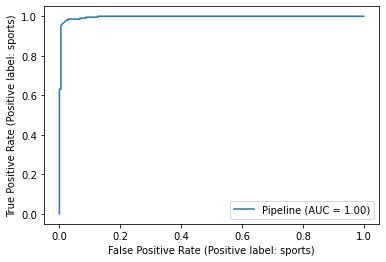

In [ ]:
# plot ROC Curve
metrics.plot_roc_curve(clf, test_reduced_LSI, test_root) 

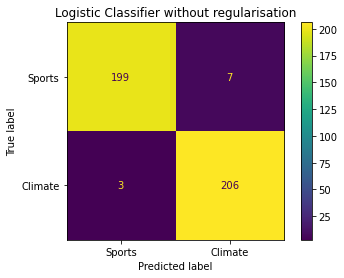

In [ ]:
# confusion matrix
plot_confusion_matrix(clf, test_reduced_LSI, test_root,display_labels=['Sports','Climate'])
plt.title('Logistic Classifier without regularisation')
# plt.savefig('Q5lrwor.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# grid search for optimal regularisation coefficient l1 logistic  
clf_lr_l1 = LogisticRegression(penalty='l1',random_state=42,solver='liblinear',max_iter=10000)
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10,30,40,50,100,200,250,500,2000,4000,10000]}
grid_l1 = GridSearchCV(clf_lr_l1,param_grid,cv=5,scoring='accuracy')
grid_l1.fit(train_reduced_LSI,train['root_label'])
pred_cv_lr_l1 = grid_l1.best_estimator_.predict(test_reduced_LSI)
print(grid_l1.best_estimator_)


clf_lr_l2 = LogisticRegression(penalty='l2',solver='liblinear', random_state=42)
grid_l2 = GridSearchCV(clf_lr_l2,param_grid,cv=5,scoring='accuracy')
grid_l2.fit(train_reduced_LSI,train['root_label'])
pred_cv_lr_l2 = grid_l2.best_estimator_.predict(test_reduced_LSI)
print(grid_l2.best_estimator_)

LogisticRegression(C=10, max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')
LogisticRegression(C=250, random_state=42, solver='liblinear')


In [ ]:

print('Best Value of L1 Regularization Parameter:',grid_l1.best_params_['C']) 
for l, n in zip(param_grid['C'],grid_l1.cv_results_['mean_test_score']):
    print(f'L1 Reg. Param.: {l}\t',f'Avg. Validation Accuracy: {n}')
    
print('Best Value of L2 Regularization Parameter:',grid_l2.best_params_['C']) 
for l, n in zip(param_grid['C'],grid_l2.cv_results_['mean_test_score']):
    print(f'L2 Reg. Param.: {l}\t',f'Avg. Validation Accuracy: {n}')

Best Value of L1 Regularization Parameter: 10
L1 Reg. Param.: 0.0001	 Avg. Validation Accuracy: 0.5009063444108761
L1 Reg. Param.: 0.001	 Avg. Validation Accuracy: 0.5009063444108761
L1 Reg. Param.: 0.01	 Avg. Validation Accuracy: 0.5009063444108761
L1 Reg. Param.: 0.1	 Avg. Validation Accuracy: 0.9094638372219999
L1 Reg. Param.: 1	 Avg. Validation Accuracy: 0.953528919302588
L1 Reg. Param.: 10	 Avg. Validation Accuracy: 0.9595657554690058
L1 Reg. Param.: 30	 Avg. Validation Accuracy: 0.9583609361918974
L1 Reg. Param.: 40	 Avg. Validation Accuracy: 0.9565500673388417
L1 Reg. Param.: 50	 Avg. Validation Accuracy: 0.9565482473701452
L1 Reg. Param.: 100	 Avg. Validation Accuracy: 0.9577567065846466
L1 Reg. Param.: 200	 Avg. Validation Accuracy: 0.9571506570086994
L1 Reg. Param.: 250	 Avg. Validation Accuracy: 0.9571506570086994
L1 Reg. Param.: 500	 Avg. Validation Accuracy: 0.9571506570086994
L1 Reg. Param.: 2000	 Avg. Validation Accuracy: 0.957751246678557
L1 Reg. Param.: 4000	 Avg. Vali

In [ ]:
# compare performance of all 3 logistic regression classifiers
print("Logistic Regression best performance metrics")
print("Accuracy with L1 regularization:", accuracy_score(test_root,pred_cv_lr_l1 ))
print("Recall with L1 regularization:", recall_score(test_root,pred_cv_lr_l1 , average='macro'))
print("Precision with L1 regularization:", precision_score(test_root,pred_cv_lr_l1, average='macro' ))
print("F1-Score with L1 regularization:", f1_score(test_root,pred_cv_lr_l1 , average='macro'))
print("Accuracy with L2 regularization:", accuracy_score(test_root,pred_cv_lr_l2 ))
print("Recall with L2 regularization:", recall_score(test_root,pred_cv_lr_l2 , average='macro'))
print("Precision with L2 regularization:", precision_score(test_root,pred_cv_lr_l2, average='macro' ))
print("F1-Score with L2 regularization:", f1_score(test_root,pred_cv_lr_l2, average='macro'))

Logistic Regression best performance metrics
Accuracy with L1 regularization: 0.9734939759036144
Recall with L1 regularization: 0.9734403307474335
Precision with L1 regularization: 0.9736383492889673
F1-Score with L1 regularization: 0.9734884342205368
Accuracy with L2 regularization: 0.9783132530120482
Recall with L2 regularization: 0.9782598597110606
Precision with L2 regularization: 0.9784598940421972
F1-Score with L2 regularization: 0.9783087189077119


In [ ]:
C_list= [0.0001,0.1,1,10,30,40,50,100,200,250,500,2000,4000,10000]
accu_coeff_l1 = []
mean_coeff_l1 = []
accu_coeff_l2 = []
mean_coeff_l2 = []
for j in C_list:
    clf_lr_l1_coeff = LogisticRegression(C=j,penalty='l1',random_state=42,solver='liblinear',max_iter=100000) 
    pred_lr_l1_coeff = clf_lr_l1_coeff.fit(train_reduced_LSI,train['root_label']).predict(test_reduced_LSI)
    accu_coeff_l1.append(accuracy_score(test_root,pred_lr_l1_coeff))
    mean_coeff_l1.append(np.mean(clf_lr_l1_coeff.coef_))
    clf_lr_l2_coeff = LogisticRegression(C=j,penalty='l2',random_state=42,solver='liblinear') 
    pred_lr_l2_coeff = clf_lr_l2_coeff.fit(train_reduced_LSI, train['root_label']).predict(test_reduced_LSI)
    accu_coeff_l2.append(accuracy_score(test_root,pred_lr_l2_coeff))
    mean_coeff_l2.append(np.mean(clf_lr_l2_coeff.coef_))

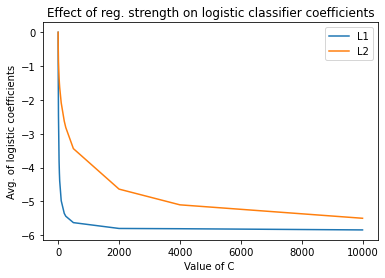

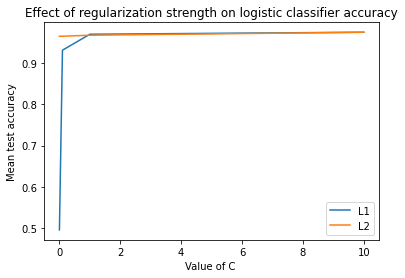

In [ ]:
fig, ax = plt.subplots()
plt.title('Effect of reg. strength on logistic classifier coefficients')
plt.plot(C_list,mean_coeff_l1,label='L1')
plt.plot(C_list,mean_coeff_l2,label='L2')
plt.xlabel('Value of C ')
plt.ylabel('Avg. of logistic coefficients')
plt.legend()
# plt.savefig('Q53.png',dpi=300,bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
plt.title('Effect of regularization strength on logistic classifier accuracy')
plt.plot(C_list[0:4],accu_coeff_l1[0:4],label='L1')
plt.plot(C_list[0:4],accu_coeff_l2[0:4],label='L2')
plt.xlabel('Value of C ')
plt.ylabel('Mean test accuracy')
plt.legend()
# plt.savefig('Q54.png',dpi=300,bbox_inches='tight')
plt.show()

#NB

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(train_reduced_LSI, train['root_label']).predict(test_reduced_LSI)
print("Number of mislabeled points out of a total %d points : %d"% (test_reduced_LSI.shape[0], (test['root_label'] != y_pred).sum()))



Number of mislabeled points out of a total 415 points : 19


[[200   6]
 [ 13 196]] 0.9542126137426035 0.954336414734984 0.9542168674698795 0.9546320829266025


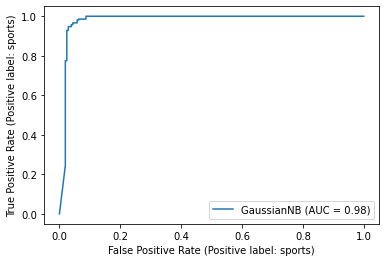

In [ ]:
## Metric
metrics.plot_roc_curve(gnb, test_reduced_LSI, test['root_label']) 
cm = confusion_matrix(test['root_label'], y_pred)
f1 = f1_score(test['root_label'], y_pred, average='macro')
recall = recall_score(test['root_label'], y_pred, average='macro')
accuracy = accuracy_score(test['root_label'], y_pred)
precision = precision_score(test['root_label'], y_pred, average='macro')
print(cm, f1, recall, accuracy, precision)

#Q8

In [ ]:

# cleaned data

train_clean_grid=[]
for data_point in (train['full_text']):

  data_point= clean(data_point)
  words=nltk.word_tokenize(data_point)

  # removing numeric characters
  
  data_point=" ".join([word for word in words if (not word.isdigit() and word not in punctuation)])
  train_clean_grid.append(data_point)

test_clean_grid=[]
for data_point in (test['full_text']):

  data_point= clean(data_point)
  words=nltk.word_tokenize(data_point)

  # removing numeric characters
  
  data_point=" ".join([word for word in words if (not word.isdigit() and word not in punctuation)])
  test_clean_grid.append(data_point)

# train_clean_grid
# test_clean_grid
print("Train clean shape", np.array(train_clean_grid).shape)
print("Test clean shape", np.array(test_clean_grid).shape)

# non cleanded data

train_nc=[]
for data_point in (train['full_text']):
  train_nc.append(data_point)

test_nc=[]
for data_point in (test['full_text']):
  test_nc.append(data_point)


train_label=[]
for data_point in (train['root_label']):
  train_label.append(data_point)

test_label=[]
for data_point in (test['root_label']):
  test_label.append(data_point)

print("Train not clean shape", np.array(train_nc).shape)
print("Test not clean shape", np.array(test_nc).shape)


print("Train label shape", np.array(train_label).shape)
print("Test label shape", np.array(test_label).shape)


Train clean shape (1657,)
Test clean shape (415,)
Train not clean shape (1657,)
Test not clean shape (415,)
Train label shape (1657,)
Test label shape (415,)


In [ ]:
# one hot encode the labels
def label(entry):
  if entry=='climate':
    return 1
  else:
    return 0

for i,entry in enumerate(train_label):

  train_label[i]=label(entry)
for i,entry in enumerate(test_label):

  test_label[i]=label(entry)
print(np.array(test_label).shape)
print(np.array(train_label).shape)

(415,)
(1657,)


In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatized(sentence):
    lemma_list = [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) 
                  for word, tag in pos_tag(word_tokenize(sentence))]
    return lemma_list

def non_lemmatized(sentence):
    lemma_list = word_tokenize(sentence)  
    return lemma_list
    
def stemming(sentence): 
  ps = PorterStemmer()
  words=nltk.word_tokenize(sentence)
  words_new = []
  # choose some words to be stemmed
  for w in words:
      w1 = ps.stem(w)
      words_new.append(w1)
  return words_new


In [ ]:
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)
scaler = StandardScaler(with_mean=False) # not absolutely required but does help

pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('scaler', scaler),
    ('reduce_dim', None),
    ('clf', None),
], memory= memory
)
param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatized,non_lemmatized,stemming),
        'reduce_dim': (TruncatedSVD(n_components=5, random_state=42),TruncatedSVD(n_components=50, random_state=42),TruncatedSVD(n_components=500, random_state=42), NMF(n_components=5, init='random', random_state=42, max_iter=300),NMF(n_components=50, init='random', random_state=42, max_iter=300),NMF(n_components=500, init='random', random_state=42, max_iter=300)), 
        'clf': (svm.SVC(kernel='linear',C=300,random_state=42),
                GaussianNB(),
                LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',max_iter=10000),
                LogisticRegression(C=250,penalty='l2',random_state=42,solver='liblinear')),  
    }
]

## Cleaned Data Grid Search

In [ ]:
# run for cleaned data

In [ ]:
grid_all_clean = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy', verbose =5)
grid_all_clean.fit(train_clean_grid, train_label)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatized at 0x7fee614390d0>, min_df=3,
                stop_words='english'), 
[ "`` Pages of history '' features excerpts from The News Journal archives "
  'including the Wilmington Morning News , The Morning News , the Every '
  'Evening and the Evening Journal . Oct. , , The News Journal Rescuers free '
  'toddler from well after two days MIDLAND , Texas Eighteen-month-old Jessica '
  'McClure was rescued last night from an abandoned well by workers who spent '
  'days drilling through solid rock to reach her as the nation waited '
  'anxiously to learn her fate . Barefoot , caked with dirt and strapped with '
  'gauze to an immobilizing backboard , Jessica was hoisted by cable out of '
  'the shaft just before p.m. EDT to the che

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.5s, 0.1min
[CV 5/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fee614390d0>, vect__min_df=3; total time=  13.0s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/ae5d56229793145c985b21f60bb9b2ae
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/8dd612b7da36da21f6f735f31a1e14c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 5.8s, 0.1min
[CV 2/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fee614390d0>, vect__min_df=5; total time=  11.7s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/97b25ab2bd447bc75606b397c0ad0fca
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/c179d9695a4bd7c7c00c7cccf7cf7e83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 9.7s, 0.2min
[CV 1/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function non_lemmatized at 0x7fee61439940>, vect__min_df=3; total time=  10.9s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/3ac257182f72a21ead4bdf030689c385
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/f10790a836ab8be4de8f6d1d98c2fa63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/skle

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 9.7s, 0.2min
[CV 4/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function non_lemmatized at 0x7fee61439940>, vect__min_df=3; total time=  10.8s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/9ca3363e71b70dafc364aa4e74bb32cd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/sklearn/pipeline/_fit_transform_one/88099ff93ddccbb418cc548904a43c04
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib/skle

GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=/var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib),
                                steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('reduce_dim', None), ('clf', None)]),
             param_grid=[{'clf': (SVC(C=300, kernel='linear', random_state=4...
                                         NMF(init='random', max_iter=300,
                                             n_components=5, random_state=42),
                                         NMF(init='random', max_iter=300,
                                             n_components=50, random_state=42),
                                         NMF(init='random', max_iter=

In [ ]:
print(grid_all_clean.best_estimator_)

Pipeline(memory=Memory(location=/var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpoleechfn/joblib),
         steps=[('vect',
                 CountVectorizer(analyzer=<function stemming at 0x7fee61439310>,
                                 min_df=5, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('scaler', StandardScaler(with_mean=False)),
                ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)),
                ('clf',
                 LogisticRegression(C=250, random_state=42,
                                    solver='liblinear'))])


In [ ]:
# store the grid results
# add the directory to store accordingly 
results_df= pd.DataFrame(grid_all_clean.cv_results_)

## add directory accordingly

results_df.to_csv ('/Users/shruti/Desktop/Winter_2022Courses/219/project1/results_clean.csv')

In [ ]:
# find top 5 best estimators from above
results_df=results_df.sort_values(by=['rank_test_score'])
results_df.to_csv ('/Users/shruti/Desktop/Winter_2022Courses/219/project1/results_clean.csv')

In [ ]:
results_df[:5]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
125       0.213590      0.006361         2.758121        0.110011   
87        0.279482      0.052969         0.838828        0.028735   
121       0.221002      0.006399         5.505581        0.222983   
86        0.304262      0.046233         0.842252        0.029780   
85        0.200890      0.010239         5.494201        0.212340   

                                             param_clf  \
125  LogisticRegression(C=250, random_state=42, sol...   
87   LogisticRegression(C=10, max_iter=10000, penal...   
121  LogisticRegression(C=250, random_state=42, sol...   
86   LogisticRegression(C=10, max_iter=10000, penal...   
85   LogisticRegression(C=10, max_iter=10000, penal...   

                                    param_reduce_dim  \
125  TruncatedSVD(n_components=500, random_state=42)   
87   TruncatedSVD(n_components=500, random_state=42)   
121  TruncatedSVD(n_components=500, random_state=42)   
86   TruncatedSVD(n_components=500, random_state=42)   
85   TruncatedSVD(n_components=500, random_state=42)   

                            param_vect__analyzer param_vect__min_df  \
125        <function stemming at 0x7fee61439310>                  5   
87   <function non_lemmatized at 0x7fee61439940>                  5   
121      <function lemmatized at 0x7fee614390d0>                  5   
86   <function non_lemmatized at 0x7fee61439940>                  3   
85       <function lemmatized at 0x7fee614390d0>                  5   

                                                params  split0_test_score  \
125  {'clf': LogisticRegression(C=250, random_state...           0.951807   
87   {'clf': LogisticRegression(C=10, max_iter=1000...           0.954819   
121  {'clf': LogisticRegression(C=250, random_state...           0.960843   
86   {'clf': LogisticRegression(C=10, max_iter=1000...           0.969880   
85   {'clf': LogisticRegression(C=10, max_iter=1000...           0.966867   

     split1_test_score  split2_test_score  split3_test_score  \
125           0.960843           0.918429           0.942598   
87            0.960843           0.936556           0.927492   
121           0.957831           0.927492           0.942598   
86            0.963855           0.933535           0.930514   
85            0.954819           0.936556           0.942598   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
125           0.945619         0.943859        0.014163                1  
87            0.939577         0.943858        0.012232                2  
121           0.927492         0.943252        0.014277                3  
86            0.918429         0.943242        0.020032                4  
85            0.912387         0.942646        0.018372                5

In [ ]:
# 5 best estimators performance on the testing set

In [ ]:
# Best Estimator 1

In [ ]:
vectorizer_clean= CountVectorizer(stop_words='english',min_df=5, analyzer= stemming)
tfidf_transformer_clean = TfidfTransformer()


    
train_data_feat_clean_vec = vectorizer_clean.fit_transform(train_clean_grid)
test_data_feat_clean_vec = vectorizer_clean.transform(test_clean_grid)
train_data_feat_clean = tfidf_transformer_clean.fit_transform(train_data_feat_clean_vec)
test_data_feat_clean = tfidf_transformer_clean.transform(test_data_feat_clean_vec)
svd_clean = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_clean = svd_clean.fit_transform(train_data_feat_clean)
test_data_LSI_clean = svd_clean.transform(test_data_feat_clean)

In [ ]:
clf_best_clean_1 = LogisticRegression(penalty='l2',C=250,solver='liblinear',random_state=42)
pred_best_clean_1 = clf_best_clean_1.fit(train_data_LSI_clean,train_label).predict(test_data_LSI_clean)
print("Test accuracy of best classifier 1 with cleaned data:", accuracy_score(test_label,pred_best_clean_1))

Test accuracy of best classifier 1 with cleaned data: 0.9855421686746988


In [ ]:
# Best Estimator 2

vectorizer_clean= CountVectorizer(stop_words='english',min_df=5, analyzer= non_lemmatized)
tfidf_transformer_clean = TfidfTransformer()


    
train_data_feat_clean_vec = vectorizer_clean.fit_transform(train_clean_grid)
test_data_feat_clean_vec = vectorizer_clean.transform(test_clean_grid)
train_data_feat_clean = tfidf_transformer_clean.fit_transform(train_data_feat_clean_vec)
test_data_feat_clean = tfidf_transformer_clean.transform(test_data_feat_clean_vec)
svd_clean = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_clean = svd_clean.fit_transform(train_data_feat_clean)
test_data_LSI_clean = svd_clean.transform(test_data_feat_clean)

clf_best_clean_2 = LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=42,max_iter=10000)
pred_best_clean_2 = clf_best_clean_2.fit(train_data_LSI_clean,train_label).predict(test_data_LSI_clean)
print("Test accuracy of best classifier 2 with cleaned data:", accuracy_score(test_label,pred_best_clean_2))

Test accuracy of best classifier 2 with cleaned data: 0.9759036144578314


In [ ]:
# Best Estimator 3

vectorizer_clean= CountVectorizer(stop_words='english',min_df=5, analyzer= lemmatized)
tfidf_transformer_clean = TfidfTransformer()


    
train_data_feat_clean_vec = vectorizer_clean.fit_transform(train_clean_grid)
test_data_feat_clean_vec = vectorizer_clean.transform(test_clean_grid)
train_data_feat_clean = tfidf_transformer_clean.fit_transform(train_data_feat_clean_vec)
test_data_feat_clean = tfidf_transformer_clean.transform(test_data_feat_clean_vec)
svd_clean = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_clean = svd_clean.fit_transform(train_data_feat_clean)
test_data_LSI_clean = svd_clean.transform(test_data_feat_clean)

clf_best_clean_3 = LogisticRegression(penalty='l2',C=250,solver='liblinear',random_state=42)
pred_best_clean_3 = clf_best_clean_3.fit(train_data_LSI_clean,train_label).predict(test_data_LSI_clean)
print("Test accuracy of best classifier 3 with cleaned data:", accuracy_score(test_label,pred_best_clean_3))

Test accuracy of best classifier 3 with cleaned data: 0.980722891566265


In [ ]:
# Best Estimator 4

vectorizer_clean= CountVectorizer(stop_words='english',min_df=3, analyzer= non_lemmatized)
tfidf_transformer_clean = TfidfTransformer()


    
train_data_feat_clean_vec = vectorizer_clean.fit_transform(train_clean_grid)
test_data_feat_clean_vec = vectorizer_clean.transform(test_clean_grid)
train_data_feat_clean = tfidf_transformer_clean.fit_transform(train_data_feat_clean_vec)
test_data_feat_clean = tfidf_transformer_clean.transform(test_data_feat_clean_vec)
svd_clean = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_clean = svd_clean.fit_transform(train_data_feat_clean)
test_data_LSI_clean = svd_clean.transform(test_data_feat_clean)

clf_best_clean_4 = LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=42,max_iter=10000)
pred_best_clean_4 = clf_best_clean_4.fit(train_data_LSI_clean,train_label).predict(test_data_LSI_clean)
print("Test accuracy of best classifier 4 with cleaned data:", accuracy_score(test_label,pred_best_clean_4))

Test accuracy of best classifier 4 with cleaned data: 0.9710843373493976


In [ ]:
# Best Estimator 5

vectorizer_clean= CountVectorizer(stop_words='english',min_df=5, analyzer= lemmatized)
tfidf_transformer_clean = TfidfTransformer()


    
train_data_feat_clean_vec = vectorizer_clean.fit_transform(train_clean_grid)
test_data_feat_clean_vec = vectorizer_clean.transform(test_clean_grid)
train_data_feat_clean = tfidf_transformer_clean.fit_transform(train_data_feat_clean_vec)
test_data_feat_clean = tfidf_transformer_clean.transform(test_data_feat_clean_vec)
svd_clean = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_clean = svd_clean.fit_transform(train_data_feat_clean)
test_data_LSI_clean = svd_clean.transform(test_data_feat_clean)

clf_best_clean_5 = LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=42,max_iter=10000)
pred_best_clean_5 = clf_best_clean_5.fit(train_data_LSI_clean,train_label).predict(test_data_LSI_clean)
print("Test accuracy of best classifier 5 with cleaned data:", accuracy_score(test_label,pred_best_clean_5))

Test accuracy of best classifier 5 with cleaned data: 0.9783132530120482


##Not Cleaned Data Grid Search

In [ ]:
# run for not cleaned data

In [ ]:
grid_all_nc = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy', verbose =5)
grid_all_nc.fit(train_nc, train_label)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatized at 0x7fee04223310>, min_df=3,
                stop_words='english'), 
[ '"Pages of history" features excerpts from The News Journal archives '
  'including the Wilmington Morning News, The Morning News, the Every Evening '
  'and the Evening Journal.\n'
  '\n'
  'Oct. 17, 1987, The News Journal\n'
  '\n'
  'Rescuers free toddler from well after two days\n'
  '\n'
  'MIDLAND, Texas – Eighteen-month-old Jessica McClure was rescued last night '
  'from an abandoned well by workers who spent 2½ days drilling through solid '
  'rock to reach her as the nation waited anxiously to learn her fate.\n'
  '\n'
  'Barefoot, caked with dirt and strapped with gauze to an immobilizing '
  'backboard, Jessica was hoisted by cable out of the 

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.7s, 0.1min
[CV 1/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fee04223310>, vect__min_df=3; total time=  13.7s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/5be19df1a01086e9145551c92f637f2b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/d4f522cd92586c70d1fe199bc3c250a3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.5s, 0.1min
[CV 3/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fee04223310>, vect__min_df=3; total time=  13.9s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/76247dbe9523a4439b62fb99e4d0b06d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/011a0969c00e9198e439ff2ebf74fbeb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 6.0s, 0.1min
[CV 1/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function lemmatized at 0x7fee04223310>, vect__min_df=5; total time=  12.1s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/7e7fc9fa0848d3d1d4339a7d2bb9b4b6
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/f1def5f48532f24cbf24987eb0662e91
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


_______________________________________________fit_transform_one - 10.0s, 0.2min
[CV 2/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function non_lemmatized at 0x7fee61b389d0>, vect__min_df=3; total time=  11.1s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/8c254d5873b365bca10d54cd84a4a475
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/5be0fd27b44eb4fad6651b17d921edfd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/skle

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.3s, 0.1min
[CV 1/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function non_lemmatized at 0x7fee61b389d0>, vect__min_df=5; total time=   8.5s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/02c29e4ab1858b64a51ee21184a3973c
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/7816454e3116860c0183173346689463
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/skle

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.5s, 0.1min
[CV 1/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function stemming at 0x7fee61b38790>, vect__min_df=3; total time=  10.6s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/8f5f17a665bf43345d306d481d27bea4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/6733b3eaab5a2570bd3c08e78c5caca0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pi

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.4s, 0.1min
[CV 4/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function stemming at 0x7fee61b38790>, vect__min_df=3; total time=  10.6s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/e4cf0a16e83adfc2a11c21da9a4820dd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/bd721ae7dabd5290c3b9f2393db9a048
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pi

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 7.4s, 0.1min
[CV 5/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function stemming at 0x7fee61b38790>, vect__min_df=3; total time=  10.3s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/3648f98e9ad18f3b217520bca8a5dad2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/7153eef414b83034df4de684151bede3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pi

/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


________________________________________________fit_transform_one - 5.9s, 0.1min
[CV 2/5] END clf=SVC(C=300, kernel='linear', random_state=42), reduce_dim=NMF(init='random', max_iter=300, n_components=50, random_state=42), vect__analyzer=<function stemming at 0x7fee61b38790>, vect__min_df=5; total time=   9.1s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/4a90258e74b520238a9d7126976e7fd4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pipeline/_fit_transform_one/e62438dcb33bd1c91c18214b5f99ba3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib/sklearn/pi

GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=/var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib),
                                steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('reduce_dim', None), ('clf', None)]),
             param_grid=[{'clf': (SVC(C=300, kernel='linear', random_state=4...
                                         NMF(init='random', max_iter=300,
                                             n_components=5, random_state=42),
                                         NMF(init='random', max_iter=300,
                                             n_components=50, random_state=42),
                                         NMF(init='random', max_iter=

In [ ]:
print(grid_all_nc.best_estimator_)

Pipeline(memory=Memory(location=/var/folders/nh/2jb9_2yd0n54g8h4jglwh28w0000gp/T/tmpt2i03mo8/joblib),
         steps=[('vect',
                 CountVectorizer(analyzer=<function stemming at 0x7fee61b38790>,
                                 min_df=5, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('scaler', StandardScaler(with_mean=False)),
                ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)),
                ('clf',
                 LogisticRegression(C=250, random_state=42,
                                    solver='liblinear'))])


In [ ]:
# store the grid results
# add the directory to store accordingly 
results_df_nc= pd.DataFrame(grid_all_nc.cv_results_)

## add directory accordingly
results_df_nc.to_csv ('/Users/shruti/Desktop/Winter_2022Courses/219/project1/results_nc.csv')

In [ ]:
# find top 5 best estimators from above
results_df_nc=results_df_nc.sort_values(by=['rank_test_score'])
results_df_nc.to_csv ('/Users/shruti/Desktop/Winter_2022Courses/219/project1/results_nc.csv')

In [ ]:
results_df_nc[:5]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
125       0.222830      0.007773         2.832338        0.114459   
121       0.230815      0.010542         5.806340        0.234825   
123       0.273594      0.015898         0.890846        0.031799   
86        0.288314      0.039629         0.894125        0.032242   
84        0.232644      0.008405         5.798037        0.230137   

                                             param_clf  \
125  LogisticRegression(C=250, random_state=42, sol...   
121  LogisticRegression(C=250, random_state=42, sol...   
123  LogisticRegression(C=250, random_state=42, sol...   
86   LogisticRegression(C=10, max_iter=10000, penal...   
84   LogisticRegression(C=10, max_iter=10000, penal...   

                                    param_reduce_dim  \
125  TruncatedSVD(n_components=500, random_state=42)   
121  TruncatedSVD(n_components=500, random_state=42)   
123  TruncatedSVD(n_components=500, random_state=42)   
86   TruncatedSVD(n_components=500, random_state=42)   
84   TruncatedSVD(n_components=500, random_state=42)   

                            param_vect__analyzer param_vect__min_df  \
125        <function stemming at 0x7fee61b38790>                  5   
121      <function lemmatized at 0x7fee04223310>                  5   
123  <function non_lemmatized at 0x7fee61b389d0>                  5   
86   <function non_lemmatized at 0x7fee61b389d0>                  3   
84       <function lemmatized at 0x7fee04223310>                  3   

                                                params  split0_test_score  \
125  {'clf': LogisticRegression(C=250, random_state...           0.948795   
121  {'clf': LogisticRegression(C=250, random_state...           0.957831   
123  {'clf': LogisticRegression(C=250, random_state...           0.957831   
86   {'clf': LogisticRegression(C=10, max_iter=1000...           0.960843   
84   {'clf': LogisticRegression(C=10, max_iter=1000...           0.960843   

     split1_test_score  split2_test_score  split3_test_score  \
125           0.969880           0.921450           0.951662   
121           0.957831           0.930514           0.954683   
123           0.966867           0.939577           0.933535   
86            0.948795           0.942598           0.936556   
84            0.957831           0.924471           0.942598   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
125           0.936556         0.945668        0.016133                1  
121           0.921450         0.944462        0.015402                2  
123           0.921450         0.943852        0.016442                3  
86            0.927492         0.943257        0.011259                4  
84            0.930514         0.943252        0.014404                5

In [ ]:

# best combinations analysis on test data


In [ ]:
# Best Estimator 1

vectorizer_nc= CountVectorizer(stop_words='english',min_df=5, analyzer= stemming)
tfidf_transformer_nc = TfidfTransformer()


    
train_data_feat_nc_vec = vectorizer_nc.fit_transform(train_nc)
test_data_feat_nc_vec = vectorizer_nc.transform(test_nc)
train_data_feat_nc = tfidf_transformer_nc.fit_transform(train_data_feat_nc_vec)
test_data_feat_nc = tfidf_transformer_nc.transform(test_data_feat_nc_vec)
svd_nc = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_nc = svd_nc.fit_transform(train_data_feat_nc)
test_data_LSI_nc = svd_nc.transform(test_data_feat_nc)

clf_best_nc_1 = LogisticRegression(penalty='l2',C=250,solver='liblinear',random_state=42)
pred_best_nc_1 = clf_best_nc_1.fit(train_data_LSI_nc,train_label).predict(test_data_LSI_nc)
print("Test accuracy of best classifier 1 with not cleaned data:", accuracy_score(test_label,pred_best_nc_1))

Test accuracy of best classifier 1 with not cleaned data: 0.983132530120482


In [ ]:
# Best Estimator 2

vectorizer_nc= CountVectorizer(stop_words='english',min_df=5, analyzer= lemmatized)
tfidf_transformer_nc = TfidfTransformer()


    
train_data_feat_nc_vec = vectorizer_nc.fit_transform(train_nc)
test_data_feat_nc_vec = vectorizer_nc.transform(test_nc)
train_data_feat_nc = tfidf_transformer_nc.fit_transform(train_data_feat_nc_vec)
test_data_feat_nc = tfidf_transformer_nc.transform(test_data_feat_nc_vec)
svd_nc = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_nc = svd_nc.fit_transform(train_data_feat_nc)
test_data_LSI_nc = svd_nc.transform(test_data_feat_nc)

clf_best_nc_2 = LogisticRegression(penalty='l2',C=250,solver='liblinear',random_state=42)
pred_best_nc_2 = clf_best_nc_2.fit(train_data_LSI_nc,train_label).predict(test_data_LSI_nc)
print("Test accuracy of best classifier 2 with not cleaned data:", accuracy_score(test_label,pred_best_nc_2))

Test accuracy of best classifier 2 with not cleaned data: 0.9783132530120482


In [ ]:
# Best Estimator 3

vectorizer_nc= CountVectorizer(stop_words='english',min_df=5, analyzer= non_lemmatized)
tfidf_transformer_nc = TfidfTransformer()


    
train_data_feat_nc_vec = vectorizer_nc.fit_transform(train_nc)
test_data_feat_nc_vec = vectorizer_nc.transform(test_nc)
train_data_feat_nc = tfidf_transformer_nc.fit_transform(train_data_feat_nc_vec)
test_data_feat_nc = tfidf_transformer_nc.transform(test_data_feat_nc_vec)
svd_nc = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_nc = svd_nc.fit_transform(train_data_feat_nc)
test_data_LSI_nc = svd_nc.transform(test_data_feat_nc)

clf_best_nc_3 = LogisticRegression(penalty='l2',C=250,solver='liblinear',random_state=42)
pred_best_nc_3 = clf_best_nc_3.fit(train_data_LSI_nc,train_label).predict(test_data_LSI_nc)
print("Test accuracy of best classifier 3 with not cleaned data:", accuracy_score(test_label,pred_best_nc_3))

Test accuracy of best classifier 3 with not cleaned data: 0.9710843373493976


In [ ]:
# Best Estimator 4

vectorizer_nc= CountVectorizer(stop_words='english',min_df=3, analyzer= non_lemmatized)
tfidf_transformer_nc = TfidfTransformer()


    
train_data_feat_nc_vec = vectorizer_nc.fit_transform(train_nc)
test_data_feat_nc_vec = vectorizer_nc.transform(test_nc)
train_data_feat_nc = tfidf_transformer_nc.fit_transform(train_data_feat_nc_vec)
test_data_feat_nc = tfidf_transformer_nc.transform(test_data_feat_nc_vec)
svd_nc = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_nc = svd_nc.fit_transform(train_data_feat_nc)
test_data_LSI_nc = svd_nc.transform(test_data_feat_nc)

clf_best_nc_4 = LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=42,max_iter=10000)
pred_best_nc_4 = clf_best_nc_4.fit(train_data_LSI_nc,train_label).predict(test_data_LSI_nc)
print("Test accuracy of best classifier 4 with not cleaned data:", accuracy_score(test_label,pred_best_nc_4))

Test accuracy of best classifier 4 with not cleaned data: 0.9686746987951808


In [ ]:
# Best Estimator 5

vectorizer_nc= CountVectorizer(stop_words='english',min_df=3, analyzer= lemmatized)
tfidf_transformer_nc = TfidfTransformer()


    
train_data_feat_nc_vec = vectorizer_nc.fit_transform(train_nc)
test_data_feat_nc_vec = vectorizer_nc.transform(test_nc)
train_data_feat_nc = tfidf_transformer_nc.fit_transform(train_data_feat_nc_vec)
test_data_feat_nc = tfidf_transformer_nc.transform(test_data_feat_nc_vec)
svd_nc = TruncatedSVD(n_components=500, random_state=42)
train_data_LSI_nc = svd_nc.fit_transform(train_data_feat_nc)
test_data_LSI_nc = svd_nc.transform(test_data_feat_nc)

clf_best_nc_5 = LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=42,max_iter=10000)
pred_best_nc_5 = clf_best_nc_5.fit(train_data_LSI_nc,train_label).predict(test_data_LSI_nc)
print("Test accuracy of best classifier 5 with not cleaned data:", accuracy_score(test_label,pred_best_nc_5))

Test accuracy of best classifier 5 with not cleaned data: 0.9759036144578314


##Q9

In [ ]:
train, test = train_test_split(df[["full_text","leaf_label"]], test_size=0.2)
map_row_to_class = {0:"chess", 1:"cricket", 2:"soccer", 3:"football", 4:"%22forest%20fire%22", 5:"flood", 6:"earthquake", 7:"drought"}


 Naive Bayes Multi-Class 

In [ ]:
gnb_multi = GaussianNB()
y_pred = gnb_multi.fit(train_reduced_LSI, train['leaf_label']).predict(test_reduced_LSI)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


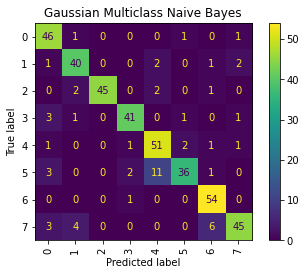

In [ ]:
# Plotting confusion matrix
plot_confusion_matrix(gnb_multi, test_reduced_LSI,test['leaf_label'],display_labels=list(map_row_to_class))
plt.xticks(rotation=90)
plt.title('Gaussian Multiclass Naive Bayes')
plt.savefig('NBmc.png',dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
# F-1 , Accuracy, Recall and Precision scores
f1 = f1_score(test['leaf_label'], y_pred, average='macro')
recall = recall_score(test['leaf_label'], y_pred, average='macro')
accuracy = accuracy_score(test['leaf_label'], y_pred)
precision = precision_score(test['leaf_label'], y_pred, average='macro')

In [ ]:
print("The F-1 score is ", f1)
print("The recall score is ", recall)
print("The accuracy score is ", accuracy)
print("The precision score is ", precision)

The F-1 score is  0.86275241582266
The recall score is  0.8640429411293913
The accuracy score is  0.8626506024096385
The precision score is  0.8709924076289208


SVM One v/s One Multi-Class

In [ ]:
ovo_classifier = OneVsOneClassifier(svm.SVC(random_state=42))
parameters = {'estimator__kernel':['linear'], 'estimator__C':[0.001,0.01,0.1,1,10,100,300,350,400,450,500,700, 1000,10000,100000,500000]}
grid_svm_mc = GridSearchCV(ovo_classifier,parameters,cv=5,scoring='accuracy')
grid_svm_mc.fit(train_reduced_LSI, train['leaf_label'])
pred_ovo_classifier = grid_svm_mc.best_estimator_.predict(test_reduced_LSI)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


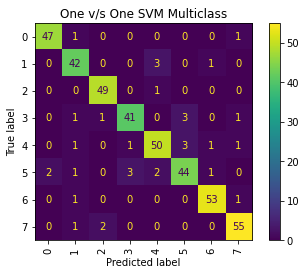

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(grid_svm_mc.best_estimator_, test_reduced_LSI,test['leaf_label'],display_labels=list(map_row_to_class))
plt.xticks(rotation=90)
plt.title('One v/s One SVM Multiclass')
plt.savefig('ovo_svm.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# F-1 , Accuracy, Recall and Precision scores
f1 = f1_score(test['leaf_label'], pred_ovo_classifier, average='macro')
recall = recall_score(test['leaf_label'], pred_ovo_classifier, average='macro')
accuracy = accuracy_score(test['leaf_label'], pred_ovo_classifier)
precision = precision_score(test['leaf_label'], pred_ovo_classifier, average='macro')

In [ ]:
print("The F-1 score is ", f1)
print("The recall score is ", recall)
print("The accuracy score is ", accuracy)
print("The precision score is ", precision)

The F-1 score is  0.917417491959335
The recall score is  0.9179826830836155
The accuracy score is  0.9180722891566265
The precision score is  0.9173864476255518


SVM One v/s Rest Multi-Class


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr_classifier = OneVsRestClassifier(svm.SVC(random_state=42))
parameters = {'estimator__kernel':['linear'], 'estimator__C':[0.001,0.01,0.1,1,10,100,300,350,400,450,500,700, 1000,10000,100000,500000]}
grid_svm_mc = GridSearchCV(ovr_classifier,parameters,cv=5,scoring='accuracy')
grid_svm_mc.fit(train_reduced_LSI, train['leaf_label'])
pred_ovr_classifier = grid_svm_mc.best_estimator_.predict(test_reduced_LSI)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


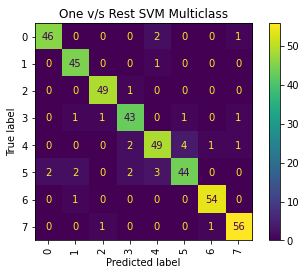

In [ ]:
# Plotting confusion matrix
plot_confusion_matrix(grid_svm_mc.best_estimator_, test_reduced_LSI,test['leaf_label'],display_labels=list(map_row_to_class))
plt.xticks(rotation=90)
plt.title('One v/s Rest SVM Multiclass')
plt.savefig('ovr_svm.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# F-1 , Accuracy, Recall and Precision scores
f1 = f1_score(test['leaf_label'], pred_ovr_classifier, average='macro')
recall = recall_score(test['leaf_label'], pred_ovr_classifier, average='macro')
accuracy = accuracy_score(test['leaf_label'], pred_ovr_classifier)
precision = precision_score(test['leaf_label'], pred_ovr_classifier, average='macro')


In [ ]:
print("The F-1 score is ", f1)
print("The recall score is ", recall)
print("The accuracy score is ", accuracy)
print("The precision score is ", precision)

The F-1 score is  0.9199942445737095
The recall score is  0.9216059570563082
The accuracy score is  0.9204819277108434
The precision score is  0.9208401840530049


# Part b)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


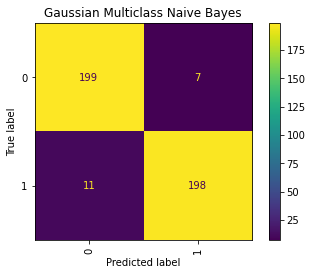

In [ ]:
# Plotting confusion matrix
plot_confusion_matrix(gnb_multi, test_reduced_LSI,test['root_label'],display_labels=list(map_row_to_class))
plt.xticks(rotation=90)
plt.title('Gaussian Multiclass Naive Bayes')
plt.savefig('NBmc.png',dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
f1 = f1_score(test['root_label'], y_pred, average='macro')
recall = recall_score(test['root_label'], y_pred, average='macro')
accuracy = accuracy_score(test['root_label'], y_pred)
precision = precision_score(test['root_label'], y_pred, average='macro')

In [ ]:
print("The F-1 score is ", f1)
print("The recall score is ", recall)
print("The accuracy score is ", accuracy)
print("The precision score is ", precision)

The F-1 score is  0.9566262541806021
The recall score is  0.9566939192641799
The accuracy score is  0.9566265060240964
The precision score is  0.9567363530778165


SVM One v/s One Multi-Class with merged labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


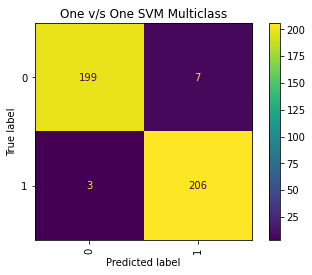

In [ ]:
plot_confusion_matrix(grid_svm_mc.best_estimator_, test_reduced_LSI,test['root_label'],display_labels=list(map_row_to_class))
plt.xticks(rotation=90)
plt.title('One v/s One SVM Multiclass')
plt.savefig('ovo_svm.png',dpi=300,bbox_inches='tight')
plt.show()

## Q 10 c)

In [ ]:
embeddings_dict = {}
dimension_of_glove = 300
with open("/content/drive/MyDrive/ECE219/Project1/glove/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))

6.1650367
5.966258
3.1520464


## Q11

In [ ]:
#Place the glove.6B.300d.txt file in a folder named glove in the project directory
embeddings_dict = {}
dimension_of_glove = 300
with open("/content/drive/My Drive/ECE219/Project1/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:

root_folder='.'
glove_folder_name='/content/drive/My Drive/ECE219/Project1/'
glove_filename='glove.6B.300d.txt'
glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
#Reference: 
#https://edumunozsala.github.io/BlogEms/jupyter/nlp/classification/embeddings/python/2020/08/15/Intro_NLP_WordEmbeddings_Classification.html
class Word2VecVectorizer:
    def __init__(self, model):
        print("Loading in word vectors...")
        self.word_vectors = model
        print("Finished loading in word vectors")
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [ ]:
vectorizer = Word2VecVectorizer(model)

Loading in word vectors...
Finished loading in word vectors


In [ ]:
Xtrain = vectorizer.fit_transform(train_clean_grid)
#Ytrain = train['root_label']
Ytrain = train_label
Xtest = vectorizer.transform(test_clean_grid)
#Ytest = test['root_label']
Ytest = test_label
print(Xtrain.shape,Xtest.shape)

Number of samples with no words found: 0 / 1657
Number of samples with no words found: 0 / 415
(1657, 300) (415, 300)


In [ ]:
clf_cv_Glove = svm.SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,5,50,200,400,600,800,1000],  
              'kernel': ['linear']}
Glove_model = GridSearchCV(clf_cv_Glove,param_grid,cv=5,scoring='accuracy',n_jobs=-1).fit(Xtrain, Ytrain)
y_pred_glove = Glove_model.best_estimator_.predict(Xtest)

In [ ]:
print(Glove_model.best_estimator_)

SVC(C=5, kernel='linear', random_state=42)


In [ ]:
print("Accuracy (Best GLoVE classifier):", accuracy_score(Ytest,y_pred_glove))
print("Recall (Best GLoVE classifier):", recall_score(Ytest,y_pred_glove))
print("Precision (Best GLoVE classifier):", precision_score(Ytest,y_pred_glove))
print("F1-Score (Best GLoVE classifier):", f1_score(Ytest,y_pred_glove))

Accuracy (Best GLoVE classifier): 0.9542168674698795
Recall (Best GLoVE classifier): 0.9271844660194175
Precision (Best GLoVE classifier): 0.9794871794871794
F1-Score (Best GLoVE classifier): 0.9526184538653367


#Q12


In [ ]:
filenames_glove = ['glove.6B.50d.txt','glove.6B.100d.txt','glove.6B.200d.txt','glove.6B.300d.txt']
accu_list_glove = []
glove_folder_name = '/content/drive/My Drive/ECE219/Project1/'
for filename in filenames_glove:
    print('Training for: ', filename)
    glove_filename=filename
    glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
    print(glove_path)
    word2vec_output_file = glove_filename+'.word2vec'
    glove2word2vec(glove_path, word2vec_output_file)
    model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    vectorizer = Word2VecVectorizer(model)
    Xtrain = vectorizer.fit_transform(train_clean_grid)
    Ytrain = train_label
    Xtest = vectorizer.transform(test_clean_grid)
    Ytest = test_label
    clf_cur = svm.SVC(kernel='linear',C=1,random_state=42)
    pred_cur = clf_cur.fit(Xtrain, Ytrain).predict(Xtest)
    accu_list_glove.append(accuracy_score(Ytest,pred_cur))  

Training for:  glove.6B.50d.txt
/content/drive/My Drive/ECE219/Project1/glove.6B.50d.txt
Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 1657
Number of samples with no words found: 0 / 415
Training for:  glove.6B.100d.txt
/content/drive/My Drive/ECE219/Project1/glove.6B.100d.txt
Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 1657
Number of samples with no words found: 0 / 415
Training for:  glove.6B.200d.txt
/content/drive/My Drive/ECE219/Project1/glove.6B.200d.txt
Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 1657
Number of samples with no words found: 0 / 415
Training for:  glove.6B.300d.txt
/content/drive/My Drive/ECE219/Project1/glove.6B.300d.txt
Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 1657
Number of samples with no words found: 0 / 415


[0.9301204819277108, 0.9349397590361446, 0.944578313253012, 0.9493975903614458]


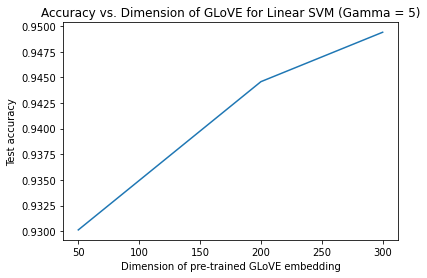

In [ ]:
dim_list = [50,100,200,300]
print(accu_list_glove)
plt.plot(dim_list,accu_list_glove)
plt.title('Accuracy vs. Dimension of GLoVE for Linear SVM (Gamma = 5)')
plt.xlabel('Dimension of pre-trained GLoVE embedding')
plt.ylabel('Test accuracy')
plt.savefig('Q101.png',dpi=300,bbox_inches='tight')
plt.show()

#Q13

In [ ]:
reduced_dim_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(Xtrain)
print(reduced_dim_embedding.embedding_.shape)

(1657, 2)


In [ ]:
s = np.random.normal(0, 1, [4732,300])
s = s / np.linalg.norm(s)
reduced_dim_s = umap.UMAP(n_components=2, metric='cosine').fit(s)

In [ ]:
YtrainTextLabel = []
for label in Ytrain:
    if(label==0):
        YtrainTextLabel.append('Sports')
    else:
        YtrainTextLabel.append('Climate')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


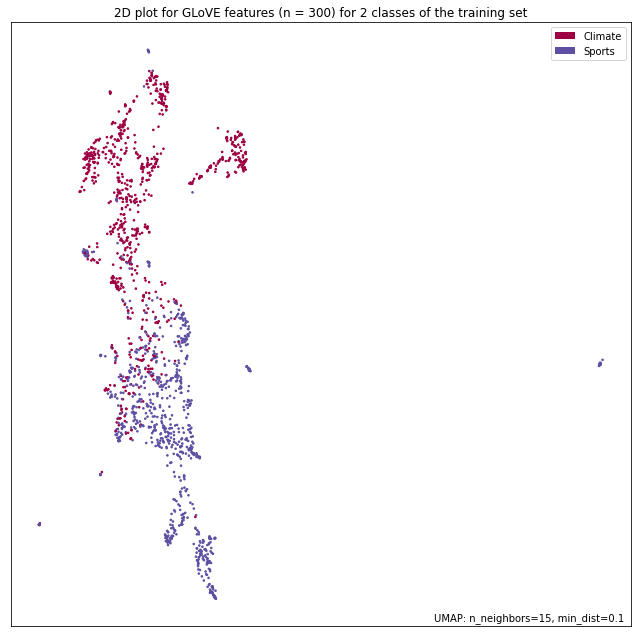

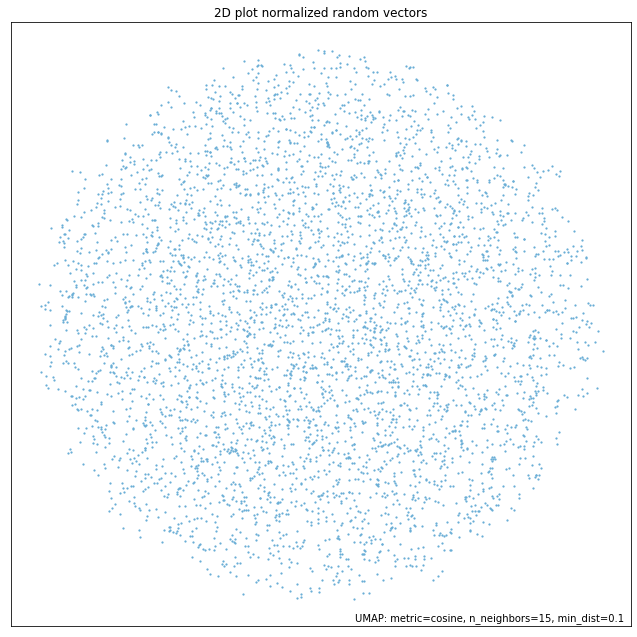

In [ ]:
import umap.plot
f = umap.plot.points(reduced_dim_embedding, labels=np.array(YtrainTextLabel))
plt.title('2D plot for GLoVE features (n = 300) for 2 classes of the training set')
plt.savefig('Q111.png',dpi=300,bbox_inches='tight')
g = umap.plot.points(reduced_dim_s)
plt.title('2D plot normalized random vectors')
plt.savefig('Q112.png',dpi=300,bbox_inches='tight')
plt.show()